# Setup

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# !git clone https://github.com/ultralytics/yolov5  # clone
%cd drive/MyDrive/capstone/yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


# Train

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 60 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.

# Validate

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:12<00:00, 66.6MB/s]


In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:02<00:00, 2024.59it/s]
val: New cache created: /content/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 157/157 [01:25<00:00,  1.84it/s]
                   all       5000      36335      0.671      0.519      0.566      0.371
Speed: 0.1ms pre-process, 3.1ms inference, 2.3ms NMS per image at shape (32,

# Detect

In [ ]:
!python detect.py --weights runs/train/exp9/weights/best.pt --img 640 --conf 0.25 --source ../../../../drive/MyDrive/capstone/img_to_predict

detect: weights=['runs/train/exp9/weights/best.pt'], source=../../../../drive/MyDrive/capstone/img_to_predict, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/3 /content/drive/MyDrive/capstone/img_to_predict/test-1.jpg: 448x640 21 chickens, 41.0ms
Jumlah ayam: 21
image 2/3 /content/drive/MyDrive/capstone/img_to_predict/test-2.jpg: 448x640 11 chickens, 8.9ms
Jumlah ayam: 11
image 3/3 /content/drive/MyDrive/capstone/img_to_predict/test.jpg: 448x640 11 chickens, 8.

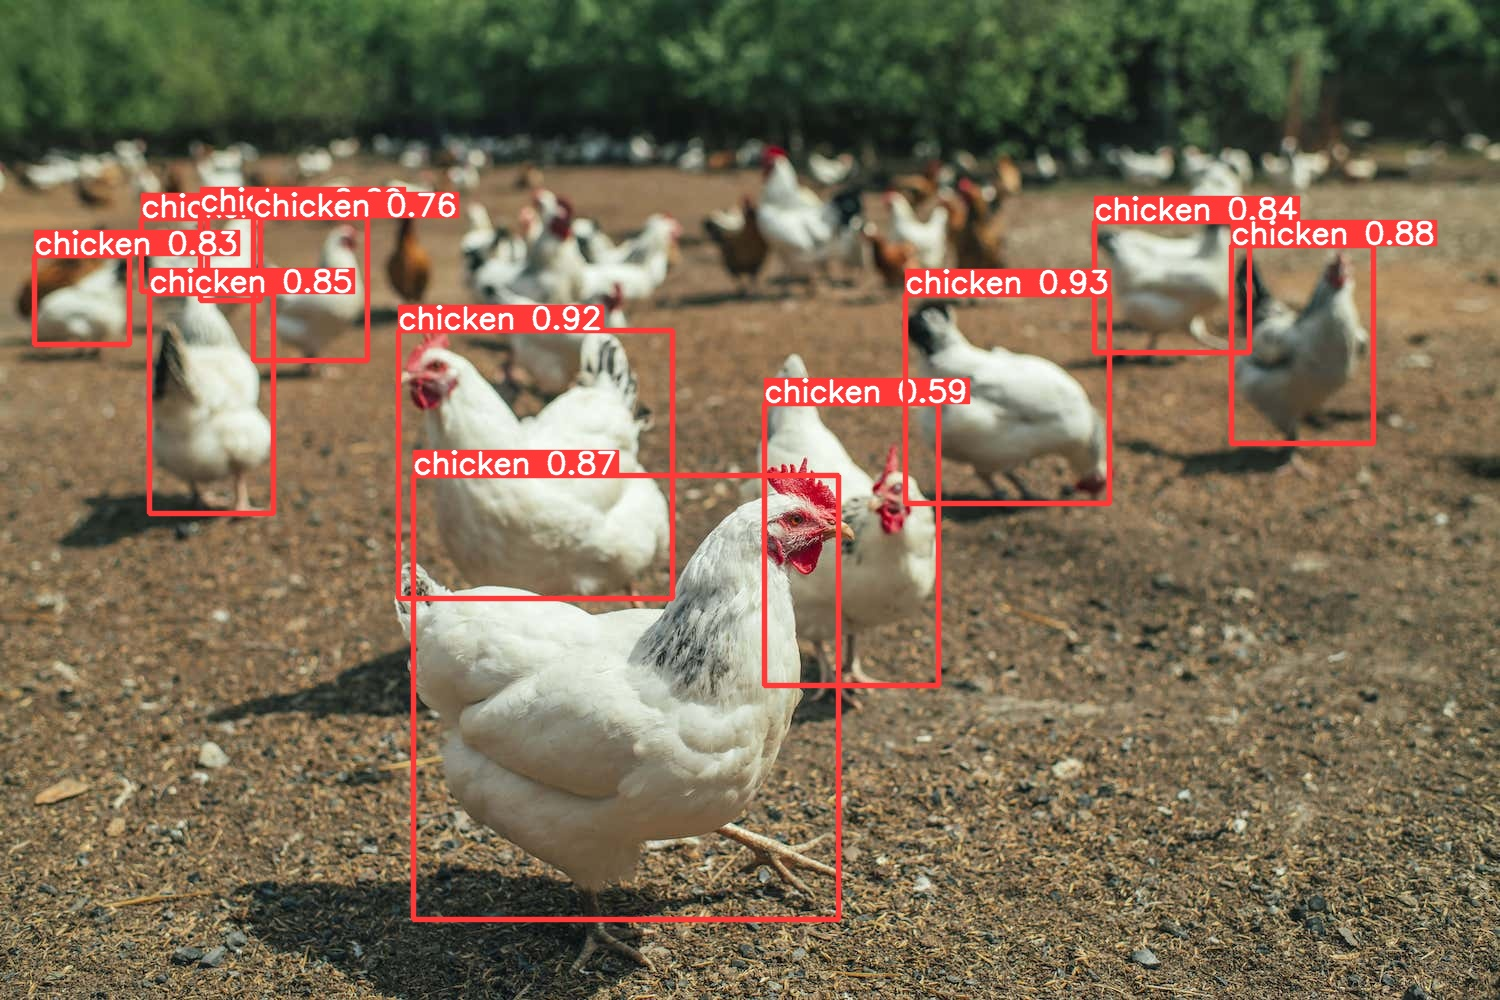

In [ ]:
display.Image(filename='runs/detect/exp5/test.jpg', width=600)

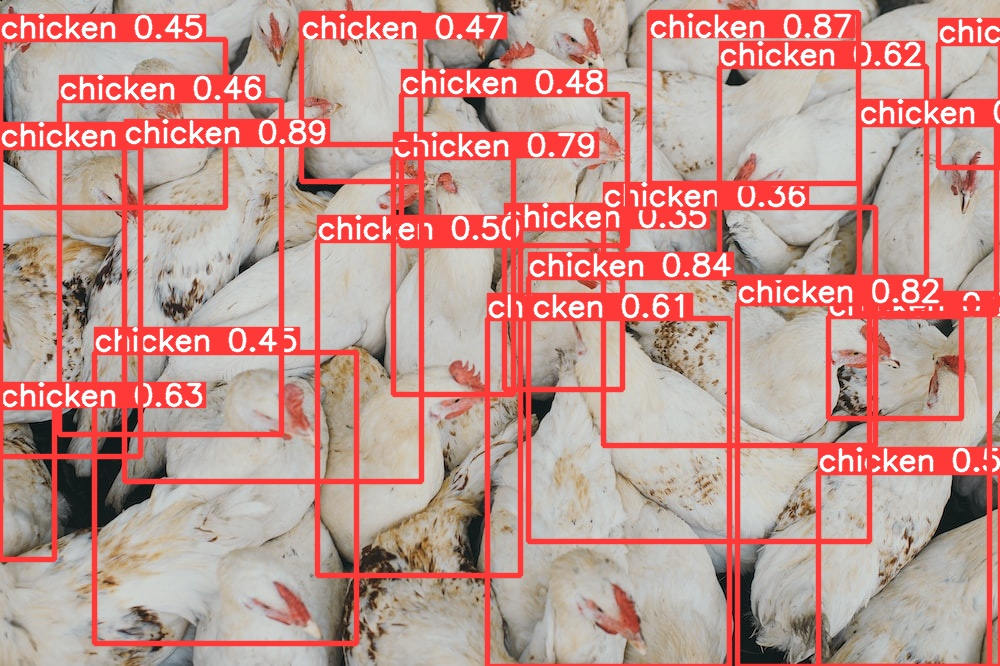

In [ ]:
display.Image(filename='runs/detect/exp5/test-1.jpg', width=600)

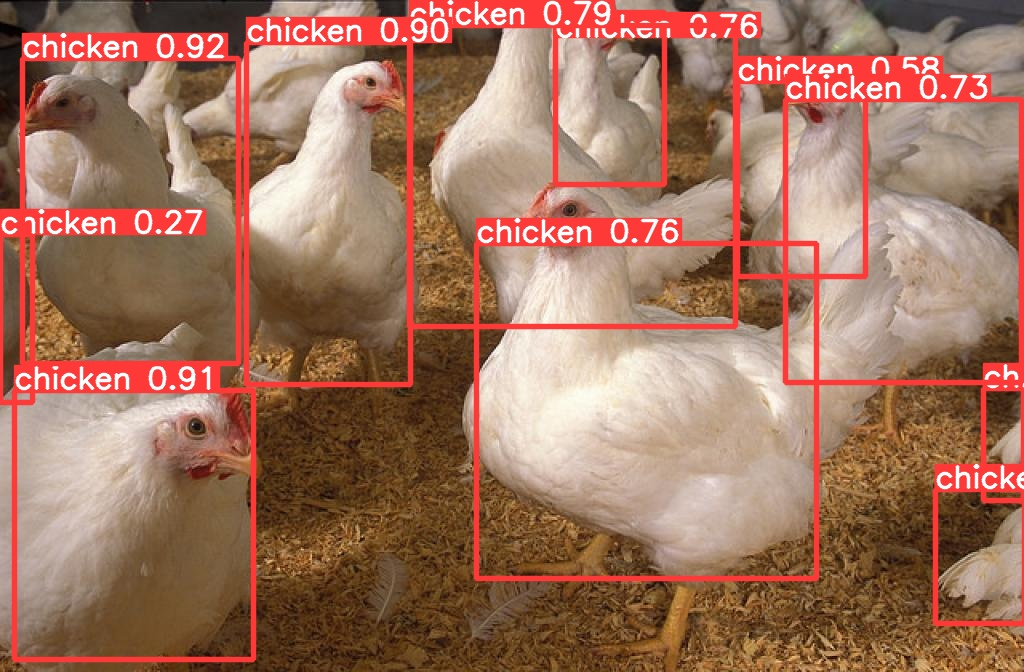

In [ ]:
display.Image(filename='runs/detect/exp5/test-2.jpg', width=600)

# Export Model

In [ ]:
!python export.py --weights runs/train/exp9/weights/best.pt --include tfjs

export: data=data/coco128.yaml, weights=['runs/train/exp9/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tfjs']
YOLOv5 🚀 v7.0-178-ga199480 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp9/weights/best.pt with output shape (1, 25200, 6) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.12.0...

                 from  n    params  module                                  arguments                     
2023-06-16 14:04:04.558392: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0                -1  1 

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

In [ ]:
!zip -r /content/file.zip /content/yolov5

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/utils/ (stored 0%)
  adding: content/yolov5/utils/general.py (deflated 66%)
  adding: content/yolov5/utils/loggers/ (stored 0%)
  adding: content/yolov5/utils/loggers/comet/ (stored 0%)
  adding: content/yolov5/utils/loggers/comet/optimizer_config.json (deflated 85%)
  adding: content/yolov5/utils/loggers/comet/README.md (deflated 63%)
  adding: content/yolov5/utils/loggers/comet/__pycache__/ (stored 0%)
  adding: content/yolov5/utils/loggers/comet/__pycache__/__init__.cpython-310.pyc (deflated 50%)
  adding: content/yolov5/utils/loggers/comet/__pycache__/comet_utils.cpython-310.pyc (deflated 47%)
  adding: content/yolov5/utils/loggers/comet/__init__.py (deflated 74%)
  adding: content/yolov5/utils/loggers/comet/comet_utils.py (deflated 69%)
  adding: content/yolov5/utils/loggers/comet/hpo.py (deflated 68%)
  adding: content/yolov5/utils/loggers/clearml/ (stored 0%)
  adding: content/yolov5/utils/loggers/clearml/clearml_uti

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>